<a href="https://colab.research.google.com/github/katha08/Bsc-Thesis-paper/blob/master/Na%C3%AFve_Bayes_Classifier_thesisv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import scipy
import pandas as pd
df=pd.read_csv('Crops02.csv')
df.head()

,State_Name,District_Name,Crop_Year,Season,Area,Rainfall,Humidity,Temperature,prevYearsRainfall,prevYearsTemperature,prevYearsHumidity,Crop
0,Andhra Pradesh,ANANTAPUR,2008,Autum,6041,0.0,0.41,33,NaN,NaN,NaN,Maize
1,Andhra Pradesh,ANANTAPUR,2008,Winter,3658,0.2,0.94,24,NaN,NaN,NaN,Maize
2,Andhra Pradesh,ANANTAPUR,2009,Autum,8852,1.1,0.60,30,0.0,33.0,0.41,Maize
3,Andhra Pradesh,ANANTAPUR,2009,Winter,4615,18.0,0.72,27,0.2,24.0,0.94,Maize
4,Andhra Pradesh,ANANTAPUR,2010,Autum,10726,22.0,0.51,32,1.1,30.0,0.60,Maize


In [0]:
df.drop(['State_Name','District_Name','Crop_Year'],axis='columns',inplace=True)
df.head()

,Season,Area,Rainfall,Humidity,Temperature,prevYearsRainfall,prevYearsTemperature,prevYearsHumidity,Crop
0,Autum,6041,0.0,0.41,33,NaN,NaN,NaN,Maize
1,Winter,3658,0.2,0.94,24,NaN,NaN,NaN,Maize
2,Autum,8852,1.1,0.60,30,0.0,33.0,0.41,Maize
3,Winter,4615,18.0,0.72,27,0.2,24.0,0.94,Maize
4,Autum,10726,22.0,0.51,32,1.1,30.0,0.60,Maize


In [0]:
target=df.Crop
inputs=df.drop('Crop',axis='columns')


In [0]:
dummies=pd.get_dummies(inputs.Season)
dummies.head(3)

,Autum,Winter
0,1,0
1,0,1
2,1,0


In [0]:
inputs=pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,Season,Area,Rainfall,Humidity,Temperature,prevYearsRainfall,prevYearsTemperature,prevYearsHumidity,Autum,Winter
0,Autum,6041,0.0,0.41,33,NaN,NaN,NaN,1,0
1,Winter,3658,0.2,0.94,24,NaN,NaN,NaN,0,1
2,Autum,8852,1.1,0.60,30,0.0,33.0,0.41,1,0


In [0]:
inputs.drop('Season',axis='columns',inplace=True)
inputs.head()

,Area,Rainfall,Humidity,Temperature,prevYearsRainfall,prevYearsTemperature,prevYearsHumidity,Autum,Winter
0,6041,0.0,0.41,33,NaN,NaN,NaN,1,0
1,3658,0.2,0.94,24,NaN,NaN,NaN,0,1
2,8852,1.1,0.60,30,0.0,33.0,0.41,1,0
3,4615,18.0,0.72,27,0.2,24.0,0.94,0,1
4,10726,22.0,0.51,32,1.1,30.0,0.60,1,0


In [0]:
inputs.dtypes

Area                      int64
Rainfall                float64
Humidity                float64
Temperature               int64
prevYearsRainfall       float64
prevYearsTemperature    float64
prevYearsHumidity       float64
Autum                     uint8
Winter                    uint8
dtype: object

In [0]:
inputs.columns[inputs.isna().any()]

Index(['prevYearsRainfall', 'prevYearsTemperature', 'prevYearsHumidity'], dtype='object')

#     **elemination NaN value(replaced by mean value)**








In [0]:
inputs.prevYearsRainfall=inputs.prevYearsRainfall.fillna(inputs.prevYearsRainfall.mean())
inputs.prevYearsTemperature=inputs.prevYearsTemperature.fillna(inputs.prevYearsTemperature.mean())
inputs.prevYearsHumidity=inputs.prevYearsHumidity.fillna(inputs.prevYearsHumidity.mean())
inputs.head()

,Area,Rainfall,Humidity,Temperature,prevYearsRainfall,prevYearsTemperature,prevYearsHumidity,Autum,Winter
0,6041,0.0,0.41,33,6.204918,28.260583,0.763338,1,0
1,3658,0.2,0.94,24,6.204918,28.260583,0.763338,0,1
2,8852,1.1,0.60,30,0.000000,33.000000,0.410000,1,0
3,4615,18.0,0.72,27,0.200000,24.000000,0.940000,0,1
4,10726,22.0,0.51,32,1.100000,30.000000,0.600000,1,0


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2,random_state=1)

In [0]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

2015
504
2015
504


In [0]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [0]:
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
pred=model.predict(X_test)
pred

array(['Moong(Green Gram)', 'Moong(Green Gram)', 'Maize',
       'Moong(Green Gram)', 'Maize', 'Moong(Green Gram)',
       'Moong(Green Gram)', 'Moong(Green Gram)', 'Rice',
       'Moong(Green Gram)', 'Maize', 'Moong(Green Gram)',
       'Moong(Green Gram)', 'Moong(Green Gram)', 'Rice', 'Maize', 'Maize',
       'Moong(Green Gram)', 'Moong(Green Gram)', 'Moong(Green Gram)',
       'Moong(Green Gram)', 'Moong(Green Gram)', 'Maize',
       'Moong(Green Gram)', 'Moong(Green Gram)', 'Moong(Green Gram)',
       'Moong(Green Gram)', 'Moong(Green Gram)', 'Moong(Green Gram)',
       'Rice', 'Moong(Green Gram)', 'Moong(Green Gram)',
       'Moong(Green Gram)', 'Moong(Green Gram)', 'Maize',
       'Moong(Green Gram)', 'Moong(Green Gram)', 'Moong(Green Gram)',
       'Moong(Green Gram)', 'Rice', 'Moong(Green Gram)', 'Rice',
       'Moong(Green Gram)', 'Moong(Green Gram)', 'Maize', 'Maize',
       'Moong(Green Gram)', 'Moong(Green Gram)', 'Moong(Green Gram)',
       'Moong(Green Gram)', 'Moong(Gree

In [0]:
model.score(X_test,y_test)

0.503968253968254

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

                   precision    recall  f1-score   support

            Maize       0.43      0.25      0.31       174
Moong(Green Gram)       0.42      0.92      0.58       147
             Rice       0.88      0.42      0.57       183

         accuracy                           0.50       504
        macro avg       0.58      0.53      0.49       504
     weighted avg       0.59      0.50      0.48       504



In [0]:
X_test[:10]

,Area,Rainfall,Humidity,Temperature,prevYearsRainfall,prevYearsTemperature,prevYearsHumidity,Autum,Winter
995,675,3.2,0.76,35,0.400000,31.000000,0.700000,1,0
1104,3,0.2,0.99,21,6.204918,28.260583,0.763338,0,1
692,10186,15.0,0.74,30,6.700000,30.000000,0.670000,1,0
1453,7,2.9,0.74,31,5.800000,34.000000,0.810000,1,0
547,16310,6.5,0.69,32,9.300000,30.000000,0.790000,1,0
1138,213,0.0,0.69,25,0.000000,25.000000,0.750000,0,1
517,41,14.0,0.76,30,33.000000,32.000000,0.750000,1,0
954,4935,2.9,0.64,26,0.000000,30.000000,0.460000,0,1
2275,100602,0.1,0.64,24,0.000000,25.000000,0.860000,0,1
1977,201,0.0,0.69,25,0.000000,25.000000,0.750000,0,1


In [0]:
y_test[:10]

995     Moong(Green Gram)
1104    Moong(Green Gram)
692                 Maize
1453    Moong(Green Gram)
547                 Maize
1138    Moong(Green Gram)
517                 Maize
954     Moong(Green Gram)
2275                 Rice
1977                 Rice
Name: Crop, dtype: object

In [0]:
model.predict(X_test[:10])

array(['Moong(Green Gram)', 'Moong(Green Gram)', 'Maize',
       'Moong(Green Gram)', 'Maize', 'Moong(Green Gram)',
       'Moong(Green Gram)', 'Moong(Green Gram)', 'Rice',
       'Moong(Green Gram)'], dtype='<U17')

In [0]:
model.predict_proba(X_test[:10])

array([[3.62817850e-01, 5.67180642e-01, 7.00015081e-02],
       [3.44881861e-01, 5.37253266e-01, 1.17864874e-01],
       [5.40627758e-01, 3.48547624e-01, 1.10824618e-01],
       [3.44608834e-01, 5.77668640e-01, 7.77225255e-02],
       [7.31232818e-01, 7.47629980e-02, 1.94004184e-01],
       [3.08427186e-01, 5.93403004e-01, 9.81698097e-02],
       [3.48832065e-01, 6.17620619e-01, 3.35473160e-02],
       [3.32823740e-01, 5.81035465e-01, 8.61407951e-02],
       [6.92207683e-10, 2.07235487e-64, 9.99999999e-01],
       [3.08484877e-01, 5.93301339e-01, 9.82137845e-02]])

**SVM**

In [0]:
from sklearn import svm
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(X_train,y_train)

y_predict=classifier.predict(X_test)

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

                   precision    recall  f1-score   support

            Maize       0.45      0.36      0.40       174
Moong(Green Gram)       0.59      0.51      0.55       147
             Rice       0.59      0.78      0.67       183

         accuracy                           0.55       504
        macro avg       0.54      0.55      0.54       504
     weighted avg       0.54      0.55      0.54       504



**Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=60)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
model.score(X_test,y_test)

0.5436507936507936

In [0]:
y_predict=model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

                   precision    recall  f1-score   support

            Maize       0.49      0.49      0.49       174
Moong(Green Gram)       0.50      0.48      0.49       147
             Rice       0.63      0.64      0.63       183

         accuracy                           0.54       504
        macro avg       0.54      0.54      0.54       504
     weighted avg       0.54      0.54      0.54       504



**Logistic Regression**

In [0]:

import sklearn.linear_model as sk
lr=sk.LogisticRegressionCV()
#from sklearn.linear_model import LogisticRegression
#lr=LogisticsRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.5059523809523809

**SVC**

In [0]:
# open the cmd shell.
# 2- cd c:\pythonVERSION\scripts
# 3- pip uninstall sklearn
# 4- open in the explorer: C:\pythonVERSION\Lib\site-packages
# 5- look for the folders that contains sklearn and delete them ..
# 6- back to cmd: pip install sklearn
from sklearn.svm import svc



ImportError: ignored

**Neural Network**

In [0]:
import keras
keras.backend.backend()

Using TensorFlow backend.


'tensorflow'

**KNN**

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score



In [0]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2,random_state=1)

In [0]:

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
classifier = KNeighborsClassifier(n_neighbors=18)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[101  39  34]
 [ 84  46  17]
 [ 70  15  98]]
                   precision    recall  f1-score   support

            Maize       0.40      0.58      0.47       174
Moong(Green Gram)       0.46      0.31      0.37       147
             Rice       0.66      0.54      0.59       183

         accuracy                           0.49       504
        macro avg       0.50      0.48      0.48       504
     weighted avg       0.51      0.49      0.49       504



In [0]:
import numpy as np
import matplotlib.pyplot as plt

error = []

# Calculating error for K values between 1 and 40
for i in range(15,20 ):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

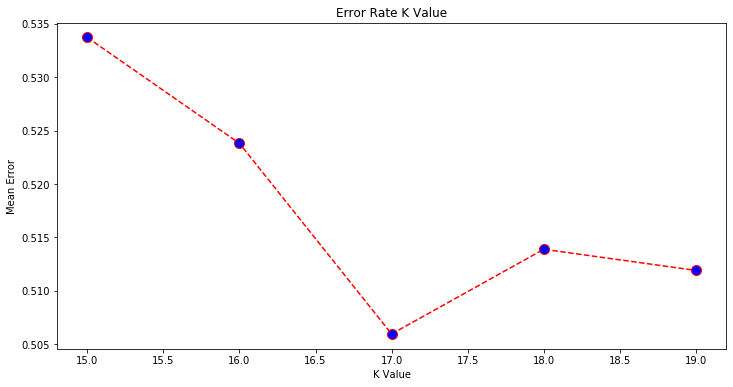

In [0]:
plt.figure(figsize=(12, 6))
plt.plot(range(15, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4861111111111111